In [2]:
library(ggplot2)
library("DESeq2")
library(dplyr)
library(tidyr)
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")

In [27]:
# function for calling DE features

callDE = function(mycount, mymeta, mygeno, mytype){
    # read meta data sheet
    meta = read.table(mymeta,sep='\t',head=T)
    meta$Replicate <- as.factor(meta$Replicate)
    meta$Treatment <- relevel(meta$Treatment, ref='control')
    # read actual counts
    count = read.table(mycount,sep='\t',head=T)
    colnames(count)[1] = "Feature"
    n = count %>% column_to_rownames(var="Feature")
    sample = colnames(n)
    # defining my genotype and my data type
    genotype = mygeno
    type = mytype
    # organizing meta data sheet
    submeta = meta %>% filter(SampleID %in% sample)
    mycontrol = meta %>% filter(Treatment == 'control' & Genotype == genotype) %>% pull(SampleID)
    mycold = meta %>% filter(Treatment == 'cold' & Genotype == genotype) %>% pull(SampleID)
    myheat = meta %>% filter(Treatment == 'heat' & Genotype == genotype) %>% pull(SampleID)
    
    # run DESeq2 for CPM calculation
    dds = DESeqDataSetFromMatrix(countData=n, colData = submeta, design=~Treatment)
    dds1 = estimateSizeFactors(dds)
    fpmcount = as.data.frame(fpm(dds1, robust = TRUE))
    totalfpm = fpmcount %>% rownames_to_column(var="Feature")
    
    write.table(file=paste(genotype,"CPM",type,"total-Aug.txt",sep='-'),totalfpm,row.names=FALSE)
    
    coldfpm = fpmcount %>% rownames_to_column(var="Feature") %>% select(Feature, mycontrol, mycold) %>% column_to_rownames(var="Feature")
    heatfpm = fpmcount %>% rownames_to_column(var="Feature") %>% select(Feature, mycontrol, myheat) %>% column_to_rownames(var="Feature")
    
    # feature in stress+control with CPM > 1 in at least 5 libraries
    expfpmcold = coldfpm[rowMeans(coldfpm) > 0.5,]
    expfpmheat = heatfpm[rowMeans(heatfpm) > 0.5,]

    write.table(file=paste(genotype,"CPM",type,"expressed-cold-Aug-1-2.txt", sep="-"),expfpmcold)
    write.table(file=paste(genotype,"CPM",type,"expressed-heat-Aug-1-2.txt", sep="-"),expfpmheat)
    
    # run DESeq2 for differential expressed features
    dds2 = DESeq(dds)
    rescold = as.data.frame(results(dds2, alpha = 0.05, name="Treatment_cold_vs_control"))
    resheat = as.data.frame(results(dds2, alpha = 0.05, name="Treatment_heat_vs_control"))
    print (head(rescold))
    totalrescold = rescold %>% rownames_to_column(var="Feature")
    totalresheat = resheat %>% rownames_to_column(var="Feature")
    write.table(file=paste(genotype,"DE",type,"total-cold-Aug-1-2.txt", sep="-"),totalrescold,row.names = FALSE)
    write.table(file=paste(genotype,"DE",type,"total-heat-Aug-1-2.txt", sep="-"),totalresheat,row.names = FALSE)
    
    # writing DE results in expressed features
    exprescold = rescold %>% rownames_to_column(var="Feature") %>% filter(Feature %in% rownames(expfpmcold))
    expresheat = resheat %>% rownames_to_column(var="Feature") %>% filter(Feature %in% rownames(expfpmheat))
    write.table(file=paste(genotype,"DE",type,"expressed-cold-Aug-1-2.txt", sep="-"),exprescold,row.names = FALSE)
    write.table(file=paste(genotype,"DE",type,"expressed-heat-Aug-1-2.txt", sep="-"),expresheat,row.names = FALSE)  
}

In [28]:
# Gene DESeq2
callDE("../ca20a3-RawReads/RefineVersion/mergedtable/ca20a3-B73-Generaw+TEelement.txt","../ca20a3-RawReads/ca20a3.tsv","B73","Gene")
callDE("../ca20a3-RawReads/RefineVersion/mergedtable/ca20a3-W22-Generaw+TEelement.txt","../ca20a3-RawReads/ca20a3.tsv","W22","Gene")
callDE("../ca20a3-RawReads/RefineVersion/mergedtable/ca20a3-Mo17-Generaw+TEelement.txt","../ca20a3-RawReads/ca20a3.tsv","Mo17","Gene")

# TE element DESeq2
callDE("../ca20a3-RawReads/RefineVersion/mergedtable/ca20a3-B73-TEelementraw+Gene.txt","../ca20a3-RawReads/ca20a3.tsv","B73","TEelement")
callDE("../ca20a3-RawReads/RefineVersion/mergedtable//ca20a3-W22-TEelementraw+Gene.txt","../ca20a3-RawReads/ca20a3.tsv","W22","TEelement")
callDE("../ca20a3-RawReads/RefineVersion/mergedtable//ca20a3-Mo17-TEelementraw+Gene.txt","../ca20a3-RawReads/ca20a3.tsv","Mo17","TEelement")

# TE family DESeq2
callDE("../ca20a3-RawReads/RefineVersion/mergedtable/ca20a3-B73-TEfamilyraw-Multiple+Gene.txt","../ca20a3-RawReads/ca20a3.tsv","B73","TEfamily")
callDE("../ca20a3-RawReads/RefineVersion/mergedtable//ca20a3-W22-TEfamilyraw-Multiple+Gene.txt","../ca20a3-RawReads/ca20a3.tsv","W22","TEfamily")
callDE("../ca20a3-RawReads/RefineVersion/mergedtable//ca20a3-Mo17-TEfamilyraw-Multiple+Gene.txt","../ca20a3-RawReads/ca20a3.tsv","Mo17","TEfamily")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



                baseMean log2FoldChange lfcSE stat pvalue padj
ENSRNA049437471        0             NA    NA   NA     NA   NA
ENSRNA049437473        0             NA    NA   NA     NA   NA
ENSRNA049437518        0             NA    NA   NA     NA   NA
ENSRNA049437607        0             NA    NA   NA     NA   NA
ENSRNA049437614        0             NA    NA   NA     NA   NA
ENSRNA049437658        0             NA    NA   NA     NA   NA


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



                   baseMean log2FoldChange     lfcSE       stat       pvalue
Zm00004b000001 498.21931992     -0.7878755 0.1691195 -4.6586901 3.182279e-06
Zm00004b000002  23.37722304     -0.2309626 0.3513922 -0.6572785 5.110018e-01
Zm00004b000003   0.00000000             NA        NA         NA           NA
Zm00004b000004   0.08093161      0.8324472 3.7620085  0.2212773 8.248765e-01
Zm00004b000005   0.00000000             NA        NA         NA           NA
Zm00004b000006   0.00000000             NA        NA         NA           NA
                       padj
Zm00004b000001 1.387125e-05
Zm00004b000002 6.115691e-01
Zm00004b000003           NA
Zm00004b000004           NA
Zm00004b000005           NA
Zm00004b000006           NA


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



                   baseMean log2FoldChange     lfcSE       stat       pvalue
Zm00014a000002    0.0000000             NA        NA         NA           NA
Zm00014a000003    0.0000000             NA        NA         NA           NA
Zm00014a000004  754.8919942     -0.0213242 0.1430015 -0.1491188 8.814599e-01
Zm00014a000005 1053.6548629     -1.0420538 0.2191448 -4.7550920 1.983561e-06
Zm00014a000006    0.0000000             NA        NA         NA           NA
Zm00014a000007    0.5796618      0.6672738 2.3000011  0.2901189 7.717253e-01
                       padj
Zm00014a000002           NA
Zm00014a000003           NA
Zm00014a000004 9.200458e-01
Zm00014a000005 1.214411e-05
Zm00014a000006           NA
Zm00014a000007           NA


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



                       baseMean log2FoldChange     lfcSE       stat    pvalue
DHH00001Zm00001d00001  0.000000             NA        NA         NA        NA
DHH00001Zm00001d00005  0.000000             NA        NA         NA        NA
DHH00001Zm00001d00007  0.000000             NA        NA         NA        NA
DHH00001Zm00001d00017  0.188434       1.726284 3.8697699  0.4460948 0.6555288
DHH00001Zm00001d00020 14.431422      -2.376333 0.7792456 -3.0495297 0.0022920
DHH00001Zm00001d00021  3.558239      -1.023748 1.1264957 -0.9087899 0.3634610
                            padj
DHH00001Zm00001d00001         NA
DHH00001Zm00001d00005         NA
DHH00001Zm00001d00007         NA
DHH00001Zm00001d00017         NA
DHH00001Zm00001d00020 0.01846016
DHH00001Zm00001d00021 0.60150396


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



                        baseMean log2FoldChange     lfcSE      stat
DHH00001Zm00004b00002  0.0000000             NA        NA        NA
DHH00001Zm00004b00005  9.8402730      3.6754650 0.7663550 4.7960347
DHH00001Zm00004b00006 29.9970983      1.5016623 0.4108798 3.6547482
DHH00001Zm00004b00010  0.0000000             NA        NA        NA
DHH00001Zm00004b00011  0.0000000             NA        NA        NA
DHH00001Zm00004b00012  0.2649498      0.7085974 3.7498518 0.1889668
                            pvalue         padj
DHH00001Zm00004b00002           NA           NA
DHH00001Zm00004b00005 1.618373e-06 2.744339e-05
DHH00001Zm00004b00006 2.574345e-04 2.365707e-03
DHH00001Zm00004b00010           NA           NA
DHH00001Zm00004b00011           NA           NA
DHH00001Zm00004b00012 8.501189e-01           NA


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



                       baseMean log2FoldChange    lfcSE      stat    pvalue
DHH00001Zm00014a00001 0.0000000             NA       NA        NA        NA
DHH00001Zm00014a00005 0.0000000             NA       NA        NA        NA
DHH00001Zm00014a00008 0.0000000             NA       NA        NA        NA
DHH00001Zm00014a00011 0.0000000             NA       NA        NA        NA
DHH00001Zm00014a00012 0.4815539          2.501 3.110899 0.8039477 0.4214272
DHH00001Zm00014a00013 0.0000000             NA       NA        NA        NA
                      padj
DHH00001Zm00014a00001   NA
DHH00001Zm00014a00005   NA
DHH00001Zm00014a00008   NA
DHH00001Zm00014a00011   NA
DHH00001Zm00014a00012   NA
DHH00001Zm00014a00013   NA


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



            baseMean log2FoldChange     lfcSE       stat       pvalue
DHH00001  3437.87048     -0.1011624 0.2456907 -0.4117468 0.6805250136
DHH00002 31843.79111     -0.2913776 0.1996505 -1.4594387 0.1444443974
DHH00003  2290.66993      0.3117595 0.3498487  0.8911268 0.3728611688
DHH00004   350.59275     -0.3289854 0.4288207 -0.7671864 0.4429706805
DHH00005   287.86972     -0.7641923 0.2203495 -3.4680917 0.0005241684
DHH00006    11.79249      1.6825981 0.4877676  3.4495894 0.0005614398
                padj
DHH00001 0.822686921
DHH00002 0.311465081
DHH00003 0.570022292
DHH00004 0.632306717
DHH00005 0.005154625
DHH00006 0.005426859


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



            baseMean log2FoldChange     lfcSE       stat       pvalue
DHH00001 30534.44329     0.19635876 0.2905094  0.6759119 4.990966e-01
DHH00002 55323.66416    -0.01552073 0.1307998 -0.1186601 9.055446e-01
DHH00003  9163.80506     0.24535193 0.3342579  0.7340199 4.629366e-01
DHH00004   278.40009    -0.19906496 0.1593321 -1.2493713 2.115293e-01
DHH00005   886.44890    -1.26504382 0.1654892 -7.6442681 2.101372e-14
DHH00006    80.33615     1.01559143 0.2745591  3.6989900 2.164591e-04
                 padj
DHH00001 7.110613e-01
DHH00002 9.538232e-01
DHH00003 6.823411e-01
DHH00004 4.326516e-01
DHH00005 1.400392e-12
DHH00006 1.883996e-03


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



           baseMean log2FoldChange     lfcSE       stat       pvalue
DHH00001 33449.2916      0.9798498 0.4361380  2.2466507 2.466236e-02
DHH00002 82471.2082      0.3689745 0.1861022  1.9826442 4.740719e-02
DHH00003  4908.4961      0.9958033 0.3170626  3.1407146 1.685362e-03
DHH00004   620.1282     -0.6223862 0.2515487 -2.4742176 1.335283e-02
DHH00005   941.1947      0.1017107 0.2445056  0.4159853 6.774207e-01
DHH00006    26.1315      2.0360050 0.5115132  3.9803571 6.881182e-05
                 padj
DHH00001 0.0951142085
DHH00002 0.1552757081
DHH00003 0.0117017428
DHH00004 0.0603548069
DHH00005 0.8372823969
DHH00006 0.0007756345


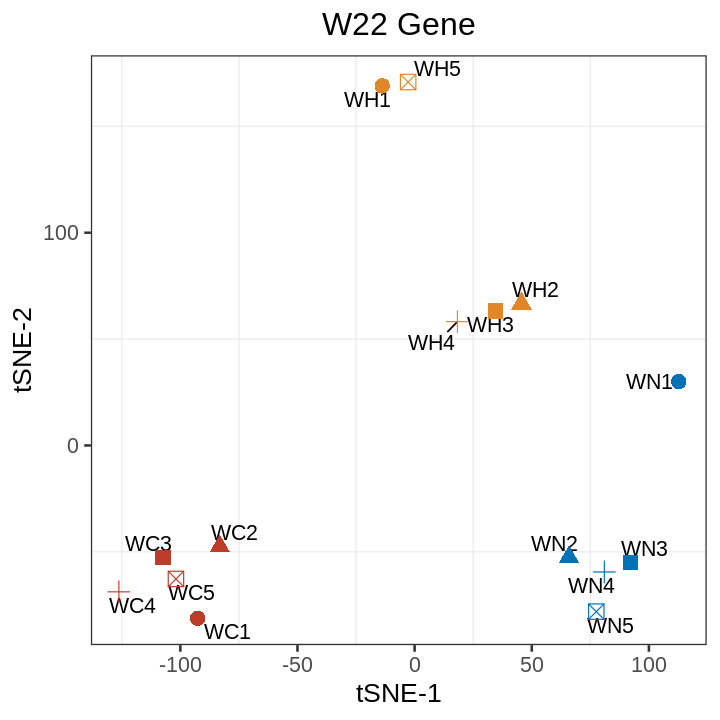

In [179]:
require("ggrepel")
myc = pal_nejm()(3)
palette=myc[1:3]
options(repr.plot.width=6, repr.plot.height=6)
p1 = ggplot(newdata, aes(x=X1,y=X2)) +
    geom_text_repel(aes(x=X1,y=X2,label=SampleID), size=4.5) +
    geom_point(aes(color=Treatment,shape=Replicate), size=4) +
    scale_x_continuous(name = 'tSNE-1') +
    scale_y_continuous(name = 'tSNE-2') +
    scale_color_manual(values=palette)+
    theme_bw(base_size = 16) + ggtitle("W22 Gene") + 
    theme(panel.grid.major=element_blank(),legend.position ="none",plot.title = element_text(hjust = 0.5))
p1

In [29]:
# using PCA methods for clustering 
myc = pal_nejm()(3)
palette=c(myc[2],myc[3],myc[1])
count = read.table("CPMvalue/Mo17-CPM-TEelement-total-Aug.txt",sep=' ',head=T)
feature = count %>% column_to_rownames(var="Feature")
exptotal = feature[rowMeans(feature) > 1,]

fit = prcomp(asinh(exptotal))
mydata = data.frame(fit$rotation)

meta = read.table("../ca20a3-RawReads/ca20a3.tsv",sep='\t',head=T)
newdata = mydata %>% rownames_to_column(var="SampleID") %>% left_join(meta, by="SampleID")
newdata$Replicate = as.factor(newdata$Replicate)

imp = summary(fit)$importance
#
xlab = sprintf("PC1 (%.01f%%)", imp[2,1]*100)
ylab = sprintf("PC2 (%.01f%%)", imp[2,2]*100)
options(repr.plot.width=6, repr.plot.height=6)
p9 = ggplot(newdata, aes(x=PC1,y=PC2)) +
    geom_text_repel(aes(x=PC1,y=PC2,label=SampleID), size=4.5) +
    geom_point(aes(color=Treatment,shape=Replicate), size=4) +
    scale_x_continuous(name = xlab) +
    scale_y_continuous(name = ylab) +
    scale_color_manual(values=palette)+
    theme_bw(base_size = 16) + ggtitle("Mo17 TE element") + 
    theme(panel.grid.major=element_blank(),legend.position = "none",plot.title = element_text(hjust = 0.5))

In [31]:
options(repr.plot.width=18, repr.plot.height=6)
svg("B73-sample-cluster.svg",width=18,height=6)
ggarrange(p1,p2,p3,nrow=1)
dev.off()
svg("W22-sample-cluster.svg",width=18,height=6)
ggarrange(p4,p5,p6,nrow=1)
dev.off()
svg("Mo17-sample-cluster.svg",width=18,height=6)
ggarrange(p7,p8,p9,nrow=1)
dev.off()
#svg("legend.svg")
#dev.off()

png 
  2

png 
  2

png 
  2

In [ ]:
library(pheatmap)

meta = read.table("../ca20a3-RawReads/ca20a3.tsv",sep='\t',head=T)
meta$Replicate <- as.factor(meta$Replicate)
meta$Treatment <- relevel(meta$Treatment, ref='control')
submeta = meta %>% filter(Genotype != "Oh43")

# read actual counts
count = read.table("../../ca20a3-Gene-addTEfamilycounts.txt",sep='\t',head=T)
colnames(count)[1] = "Feature"
n = count %>% column_to_rownames(var="Feature") %>% select(submeta$SampleID)

# run DESeq2 for CPM calculation
dds = DESeqDataSetFromMatrix(countData=n, colData = submeta, design=~Treatment)
dds1 = estimateSizeFactors(dds)
fpmcount = as.data.frame(fpm(dds1, robust = TRUE))

#totalfpm = fpmcount %>% rownames_to_column(var="Feature")
expfpmtotal = fpmcount[rowMeans(fpmcount) > 1,]
print (head(expfpmtotal))
#rownames(expfpmtotal) = expfpmtotal[,1]
#expfpmtotal = expfpmtotal[,-1]

# definee the normalize function
norm <- function(x){
  (x-min(x))/(max(x)-min(x))
}
newdata <- apply(expfpmtotal, 1, norm)
mycol = submeta %>% select(SampleID, Genotype, Treatment) %>% column_to_rownames(var="SampleID")
print (dim(newdata))
xx = pheatmap(t(newdata), annotation_col = mycol, show_rownames = F, fontsize = 16)


save_pheatmap_pdf <- function(x, filename, width=12, height=12) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
#    tiff(filename, units="in", width=width, height=height, res=300)
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(xx, "ca20-Gene-B73ref-CPM1.pdf")


                      BC1       BC2       BC3       BC4       BC5       BH1
ENSRNA049459267  3.905942 10.831905 16.608343  29.98391  51.69353 17.716612
ENSRNA049462250  2.174062  5.299061  9.619489  16.94091  33.98591  8.107602
ENSRNA049462318 12.970676 30.586494 52.494927  80.35687 197.16594 50.747583
ENSRNA049462348  6.595884 16.520603 31.881736  56.31977  97.27277 36.994688
ENSRNA049465110 17.871528 39.197469 85.554560 140.67450 303.49103 76.451685
ENSRNA049469775 53.246100 34.093226 17.589923  35.28107  56.37850 10.990305
                      BH2        BH3       BH4        BH5       BN1       BN2
ENSRNA049459267  43.67886  20.135733  4.121084  31.827440  2.524762 16.159037
ENSRNA049462250  21.22802  10.196612  2.993950  23.217586  1.150169  6.768014
ENSRNA049462318 113.47699  60.510195 12.328029 116.281408  8.920827 46.598908
ENSRNA049462348  69.06444 159.643919  7.608155  66.508709  5.442265 90.931017
ENSRNA049465110 168.45464 102.172108 18.668159 154.832274 14.559462 77.654052


In [71]:
# calling DE gene for rn20a DE gene
meta = read.table("../../../rn20a/rn20a.tsv",sep='\t',head=T)
submeta = meta %>% filter(Experiment == 'NM', Timepoint=='25')
#meta = read.table("../../../rn20a/rn20a-NM/rn20a-Gene-Raw.txt",sep='\t',head=T)
submeta$Replicate <- as.factor(submeta$Replicate)
submeta$Treatment <- relevel(submeta$Treatment, ref='Control')

# read actual counts
count = read.table("../../../rn20a/rn20a-NM/rn20a-Gene-Raw.txt",sep='\t',head=T)
colnames(count)[1] = "Feature"

# organizing meta data sheet
mymeta = submeta %>% filter(Genotype=="W22") 
mymeta
n = count %>% select(Feature, mymeta$SampleID) %>% mutate(lg2ratio = log2(NM100/NM75))
head(n)
# run DESeq2 for CPM calculation
write.table(file="W22_cold_rn20a_DEgene.txt",n)

SampleID,Tissue,Genotype,Treatment,Replicate,MergeID,Timepoint,Experiment,paired,spots,avgLength
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<lgl>,<int>,<int>
NM100,leaf,W22,Cold,7,m08,25,NM,TRUE,26906448,302
NM75,leaf,W22,Control,11,m18,25,NM,TRUE,26596408,302


,Feature,NM100,NM75,lg2ratio
,<fct>,<int>,<int>,<dbl>
1,ENSRNA049437471,0,0,NaN
2,ENSRNA049437473,0,0,NaN
3,ENSRNA049437518,0,0,NaN
4,ENSRNA049437607,0,0,NaN
5,ENSRNA049437614,0,0,NaN
6,ENSRNA049437658,0,0,NaN


In [81]:
# scale factor 

count = read.table("../ca20a3-RawReads/RefineVersion/ca20a3-Gene-Mo17index-Mo17sample-chromosome.txt",sep='\t',head=T)
meta = read.table("../ca20a3-RawReads/ca20a3.tsv",sep='\t',head=T)

# read meta data sheet
meta$Replicate <- as.factor(meta$Replicate)
meta$Treatment <- relevel(meta$Treatment, ref='control')
# read actual counts
colnames(count)[1] = "Feature"
n = count %>% column_to_rownames(var="Feature")

sample = colnames(n)

# organizing meta data sheet
submeta = meta %>% filter(SampleID %in% sample)

# run DESeq2 for CPM calculation
dds = DESeqDataSetFromMatrix(countData=n, colData = submeta, design=~Treatment)
dds1 = estimateSizeFactors(dds)

write.table(dds1$sizeFactor, file="Mo17-size-factor-ca20a3.txt")